### Seattle Airbnb Survey Data Analysis

Author: Mariam Martine Ndoyela

### Introduction
The goal of this project is to take a deep dive, comprehend, navigate, and gather information on what's happening with Seattle's Airbnb. We will be able to address a few queries with the information provided. Join me as we explore costs, types of rooms, and room availability for the shared data set. Yes, it will be enjoyable; in fact, for certain readers, it will seem as though we have already arrived in Seattle.

### CRISP-DM Steps
- Business Understanding
- Data Understanding
- Data Preparation
- Data visualisation
- Conclusion

### Business Understanding

As part of the Udacity project, we have to write a blog post using any data collection that we want. My gaze fell upon Seattle's Airbnb; Udacity has given me access to three sets of data: calendar, review, and listing. I manually examined the dataset to see what was there, and from there, I came up with three questions that will be answered as we proceed through the process:
- i. What is the monthly availability trend of rooms?
- ii. Which room type has the greatest count, and which one has the lowest? What is the price range for each type of room? 
- iii. What are the top five places that have received alot of comments/reviews from 2009 to 2016 (as per given dataset)

As I mentioned, there will be a lot of additional helpful information that we discover along the way. Hold Your Gaze Up enjoy a ton of Seattle Airbnb findings &#x1F600;&#x1F600;&#x1F600;

### Dependencies

In [1]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: celery 3.1.26.post2 has a non-standard dependency specifier pytz>dev. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import packages &#x1F4E6;

In [2]:
# Import NumPy for numerical operations
import numpy as np 

# Import pandas for data manipulation and analysis
import pandas as pd 

# Import matplotlib for data visualization
import matplotlib.pyplot as plt  

# Import seaborn for statistical data visualization
import seaborn as sns  

# Import emoji for working with emojis in text data
import emoji  

# Import RandomForestRegressor from scikit-learn for regression
from sklearn.ensemble import RandomForestRegressor 

# Import cross_val_score for cross-validation
from sklearn.model_selection import cross_val_score 

# Import Counter for counting occurrences of elements
from collections import Counter  

# Set matplotlib to display plots inline in the Jupyter Notebook
%matplotlib inline

# Ignore any warnings that may occur during execution
import warnings
warnings.filterwarnings('ignore')

### Data Set, Q&A 

### i. Calendar &#x1F4C5;

- The primary purpose of this data frame is availability and prices of rooms on a given day of the month. Let's get started &#x1F3C3;&#x1F3C3;&#x1F3C3;

- Data Understanding

In [3]:
# Load data from the 'calendar.csv' file into a pandas DataFrame

seattle_calendar = pd.read_csv('calendar.csv')

In [4]:
# Display the first 2 rows of the seattle_calendar DataFrame

seattle_calendar.head(2)

,listing_id,date,available,price
0,241032,1/4/2016,t,$85.00
1,241032,1/5/2016,t,$85.00


In [5]:
# Display information about the seattle_calendar DataFrame

seattle_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1048575 non-null  int64 
 1   date        1048575 non-null  object
 2   available   1048575 non-null  object
 3   price       705913 non-null   object
dtypes: int64(1), object(3)
memory usage: 32.0+ MB


- Data Preparation

In [6]:
# Calculate the percentage of missing values in each column of the seattle_calendar DataFrame
seattle_calendar.isnull().sum() / seattle_calendar.shape[0]

listing_id    0.000000
date          0.000000
available     0.000000
price         0.326788
dtype: float64

In [7]:
# Fill missing values in the 'price' column of the seattle_calendar DataFrame with 0
seattle_calendar['price'].fillna(0, inplace=True)

# Print the 'price' column
print(seattle_calendar['price'])

0           $85.00 
1           $85.00 
2                 0
3                 0
4                 0
             ...   
1048570    $120.00 
1048571    $120.00 
1048572    $120.00 
1048573    $120.00 
1048574    $120.00 
Name: price, Length: 1048575, dtype: object


In [8]:
# Check if there are any null values in the seattle_calendar DataFrame after treating them
seattle_calendar.isnull().sum() / seattle_calendar.shape[0]

listing_id    0.0
date          0.0
available     0.0
price         0.0
dtype: float64

In [9]:
# Convert the 'price' column in the seattle_calendar DataFrame to string data type
seattle_calendar['price'] = seattle_calendar['price'].astype(str)


# Remove the dollar sign ($) from the 'price' column in the seattle_calendar DataFrame
seattle_calendar['price'] = seattle_calendar['price'].str.replace('$', '')


# Remove commas from the 'price' column in the seattle_calendar DataFrame
seattle_calendar['price'] = seattle_calendar['price'].str.replace(',', '')


# Convert the 'price' column of the seattle_calendar DataFrame to float data type
seattle_calendar['price'] = seattle_calendar['price'].astype(float)


# Print the 'price' column of the seattle_calendar DataFrame
print(seattle_calendar['price'])

0           85.0
1           85.0
2            0.0
3            0.0
4            0.0
           ...  
1048570    120.0
1048571    120.0
1048572    120.0
1048573    120.0
1048574    120.0
Name: price, Length: 1048575, dtype: float64


- Data Visualisation

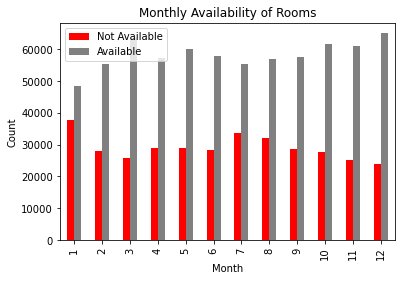

In [10]:
#Filter the data frame to include only the relevant columns and convert the "date" column to a datetime format:
seattle_calendar['date'] = pd.to_datetime(seattle_calendar['date'])
df = seattle_calendar[['date', 'available']]

#Create a new column to represent the month:
df['month'] = df['date'].dt.month

#Group the data by month and availability, and count the number of occurrences:
df_grouped = df.groupby(['month', 'available']).size().unstack()

# Define custom colors for the bars
colors = ['#FF0000', '#808080']  # Red for "Not Available", Green for "Available"

# Plot the grouped bar graph with custom colors
df_grouped.plot(kind='bar', color=colors)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Availability of Rooms')
plt.legend(['Not Available', 'Available'])
plt.show()

### Answer

- In January and July 2016, alot of rooms where not available
- In March and December 2016 alot of rooms were available

# 

### ii. Listing &#x1F3E0;
This data frame has several functions, a few of which are to display room names, room types, review scores, hostnames, and plenty of other data. Join me and enjoy in these finds &#x1F490;&#x1F490;&#x1F490;

- Data Understanding

In [11]:
# Load data from the 'listings.csv' file into a pandas DataFrame
seattle_listing = pd.read_csv('listings.csv')

In [12]:
# Display the first 1 rows of the seattle_listing DataFrame
seattle_listing.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [13]:
# Display information about the seattle_listing DataFrame

seattle_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

- Data Preparation

In [14]:
# Calculate the percentage of missing values in each column of the seattle_listing DataFrame

seattle_listing.isnull().sum()/seattle_listing.shape[0]

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
                                      ...   
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
calculated_host_listings_count      0.000000
reviews_per_month                   0.164222
Length: 92, dtype: float64

In [15]:
# Calculate the percentage of missing values for each column
missing_percentage = seattle_listing.isnull().sum() / len(seattle_listing) * 100

# Sort the columns by their missing percentage in descending order
missing_percentage = missing_percentage.sort_values(ascending=False)

# Print the columns and their corresponding missing percentages
print(missing_percentage)

license             100.000000
square_feet          97.459403
monthly_price        60.267156
security_deposit     51.126244
weekly_price         47.380828
                       ...    
room_type             0.000000
accommodates          0.000000
bed_type              0.000000
amenities             0.000000
longitude             0.000000
Length: 92, dtype: float64


In [16]:
#Dropping Columns with more that 50% Null values

# Calculate the percentage of missing values for each column
missing_percentage = seattle_listing.isnull().sum() / len(seattle_listing) * 100

# Get the column names where missing percentage is greater than 50%
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Drop the columns from the DataFrame
seattle_listing = seattle_listing.drop(columns_to_drop, axis=1)

In [17]:
#Lets check again Missing values in descending order

# Sort the columns by their missing percentage in descending order
missing_percentage = missing_percentage.sort_values(ascending=False)

# Print the columns and their corresponding missing percentages
print(missing_percentage)

license             100.000000
square_feet          97.459403
monthly_price        60.267156
security_deposit     51.126244
weekly_price         47.380828
                       ...    
room_type             0.000000
accommodates          0.000000
bed_type              0.000000
amenities             0.000000
longitude             0.000000
Length: 92, dtype: float64


In [18]:
# Convert the 'price' column in the seattle_listing DataFrame to string data type
seattle_listing['price'] = seattle_listing['price'].astype(str)

# Remove the dollar sign ($) from the 'price' column in the seattle_listing DataFrame
seattle_listing['price'] = seattle_listing['price'].str.replace('$', '')

# Remove commas from the 'price' column in the seattle_listing DataFrame
seattle_listing['price'] = seattle_listing['price'].str.replace(',', '')

# Convert the 'price' column of the seattle_listing DataFrame to float data type
seattle_listing['price'] = seattle_listing['price'].astype(float)

print(seattle_listing['price'])

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64


- Data Visualisation

In [19]:
# Count the number of each room type
room_type_counts = seattle_listing['room_type'].value_counts()

print(room_type_counts)

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64


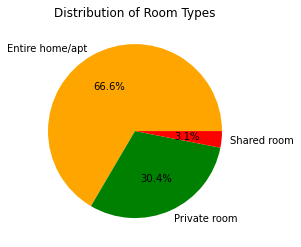

In [20]:
# room types
room_types = ['Entire home/apt', 'Private room', 'Shared room']
sizes = [2541, 1160, 117]  # Values representing the sizes of each category

# Define colors for each category
colors = ['orange', 'green', 'red']

# Create the pie chart
plt.pie(sizes, labels=room_types, autopct='%1.1f%%', colors=colors)

# Add a title
plt.title('Distribution of Room Types')

# Display the chart
plt.show()

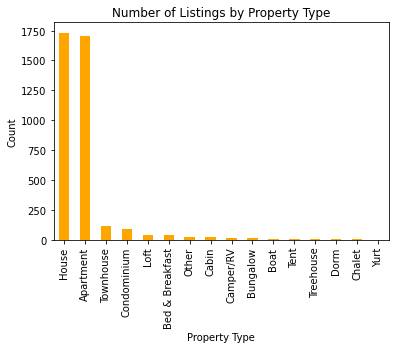

In [21]:
# Count the number of each property type
property_counts = seattle_listing['property_type'].value_counts()

# Create a bar plot
property_counts.plot.bar(color='orange')

# Set the x-axis label, y-axis label, and title of the plot
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Number of Listings by Property Type')

# Display the plot
plt.show()

In [22]:
# Count the number of each room type
property_type_counts = seattle_listing['property_type'].value_counts()

print(property_type_counts)

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64


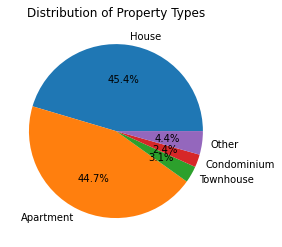

In [23]:
# property types
property_types = ['House', 'Apartment', 'Townhouse', 'Condominium', 'Other']
sizes = [1733, 1708, 118, 91, 167]  # Values representing the sizes of each category

# Define colors for each category
#colors = ['orange', 'green', 'red']

# Create the pie chart
plt.pie(sizes, labels=property_types, autopct='%1.1f%%') #, colors=colors)

# Add a title
plt.title('Distribution of Property Types')

# Display the chart
plt.show()

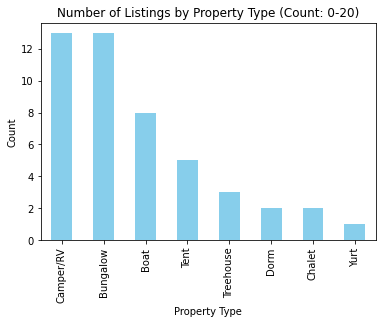

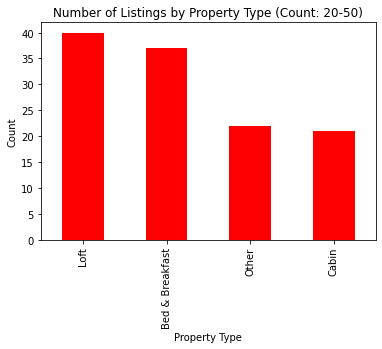

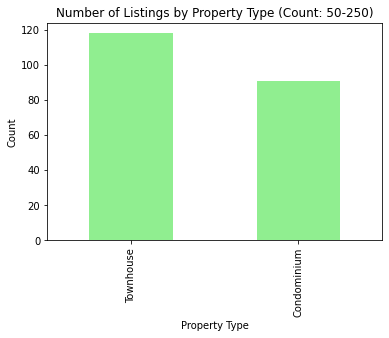

In [24]:
# Filtering property types with count between 0 and 50
count_range_1 = property_counts[(property_counts >= 0) & (property_counts <= 20)]

# Plotting the first bar chart
count_range_1.plot.bar(color='skyblue')

# Adding labels and title for the first plot
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Number of Listings by Property Type (Count: 0-20)')

# Displaying the first plot
plt.show()

# Filtering property types with count between 20 and 50
count_range_2 = property_counts[(property_counts > 20) & (property_counts <= 50)]

# Plotting the second bar chart
count_range_2.plot.bar(color='red')

# Adding labels and title for the second plot
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Number of Listings by Property Type (Count: 20-50)')

# Displaying the second plot
plt.show()

# Filtering property types with count between 50 and 250
count_range_3 = property_counts[(property_counts > 50) & (property_counts <= 250)]

# Plotting the third bar chart
count_range_3.plot.bar(color='lightgreen')

# Adding labels and title for the third plot
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Number of Listings by Property Type (Count: 50-250)')

# Displaying the third plot
plt.show()

In [25]:
# Group the data by room_type and calculate the minimum and maximum prices for each room type
price_ranges = seattle_listing.groupby('room_type')['price'].agg(['min', 'max'])

# Print the price ranges for each room type
print(price_ranges)

                  min     max
room_type                    
Entire home/apt  39.0  1000.0
Private room     20.0   399.0
Shared room      22.0   118.0


### Answer
- The room types with the largest counts are Entire home/apt, followed by private, and the lowest counts are shared room.

- Price range for Entire home/apt, Private room and Shared room is 39 to 1,000 USD, 20 to 399 USD and 22 to 118 USD respectively.

### iii. Review

- Data Understanding

In [26]:
# Load data from the 'reviews.csv' file into a pandas DataFrame

seattle_review = pd.read_csv('reviews.csv')

In [27]:
# Display the first 2 rows of the seattle_review DataFrame

seattle_review.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [28]:
# Display information about the seattle_review DataFrame

seattle_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


- Data Preparation

In [29]:
# Calculate the percentage of missing values in each column of the seattle_review DataFrame

seattle_review.isnull().sum()/seattle_review.shape[0]

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64

In [30]:
# Fill missing values in the 'comments' column of the seattle_review DataFrame with 0
seattle_review['comments'].fillna(0, inplace=True)

# Print the 'price' column
print(seattle_review['comments'])

0        Cute and cozy place. Perfect location to every...
1        Kelly has a great room in a very central locat...
2        Very spacious apartment, and in a great neighb...
3        Close to Seattle Center and all it has to offe...
4        Kelly was a great host and very accommodating ...
                               ...                        
84844    The description and pictures of the apartment ...
84845    We had an excellent stay. It was clean and com...
84846    Gran ubicación, cerca de todo lo atractivo del...
84847    Very good apartement, clean and well sized. Si...
84848    Breanne was a great host. Check in was easy, s...
Name: comments, Length: 84849, dtype: object


In [31]:
# Check if there are any null values in the seattle_review DataFrame after treating them
seattle_review.isnull().sum() / seattle_review.shape[0]

listing_id       0.0
id               0.0
date             0.0
reviewer_id      0.0
reviewer_name    0.0
comments         0.0
dtype: float64

- Data Visualisation

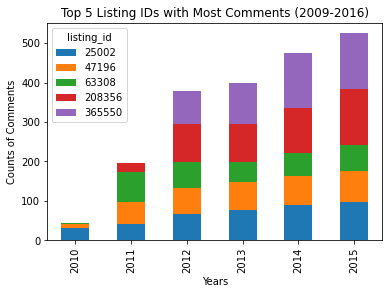

In [32]:
# convert date column to datetime format
seattle_review['date'] = pd.to_datetime(seattle_review['date'], errors = 'coerce', utc = True)

# Filter the data for the years 2009 to 2016
filtered_data = seattle_review[(seattle_review['date'].dt.year >= 2009) & (seattle_review['date'].dt.year <= 2016)]

# Calculate the count of comments for each listing_id within each year
grouped_data = filtered_data.groupby(['listing_id', filtered_data['date'].dt.year])['comments'].count().reset_index()

# Identify the top 5 listing_ids with the highest comment counts across all the years
top_5_listing_ids = grouped_data.groupby('listing_id')['comments'].sum().nlargest(5).index

# Filter the grouped data for the top 5 listing_ids
top_5_data = grouped_data[grouped_data['listing_id'].isin(top_5_listing_ids)]

# Plot the stacked graph
pivot_data = top_5_data.pivot(index='date', columns='listing_id', values='comments')
pivot_data.plot(kind='bar', stacked=True)
#plt.bar(date, comments, edgecolor='black', linewidth=1, capsize=5)

# Set the labels and title
plt.xlabel('Years')
plt.ylabel('Counts of Comments')
plt.title('Top 5 Listing IDs with Most Comments (2009-2016)')

# Show the plot
plt.show()


# Create bar chart with rounded edges
#plt.bar(categories, values, edgecolor='black', linewidth=1, capsize=5)

# Customize the chart
#plt.xlabel('Categories')
#plt.ylabel('Values')
#plt.title('Bar Chart with Rounded Edges')

# Display the chart
#plt.show()

In [33]:
# create a list called ids
ids = [25002, 47196, 63308, 208356, 365550]

# filter seattle_listing's id based on ids created above
filtered_df = seattle_listing[seattle_listing['id'].isin(ids)]

# store name and price in result
result = filtered_df[['name', 'price']]

print(result)

                                     name  price
1441  contemporary art loft downtown [17]   89.0
1447   contemporary art loft downtown [7]   89.0
2568    Guest Studio - North Capitol Hill   89.0
3083   Beautiful, Quiet, Friendly Ballard   75.0
3600    Capitol Hill Suite + Free Parking   65.0


listing_id  63308   208356  365550
month                             
Apr             30      30      30
Aug             31      31      31
Dec             31      31      31
Feb             29      29      29
Jan             30      30      30
Jul             31      31      31
Jun             30      30      30
Mar             31      31      31
May             31      31      31
Nov             30      30      30
Oct             31      31      31
Sep             30      30      30
listing_id  63308   208356  365550
month                             
Jan             30      30      30
Feb             29      29      29
Mar             31      31      31
Apr             30      30      30
May             31      31      31
Jun             30      30      30
Jul             31      31      31
Aug             31      31      31
Sep             30      30      30
Oct             31      31      31
Nov             30      30      30
Dec             31      31      31


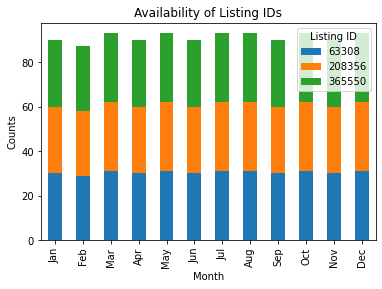

In [34]:
# Create a list of months in the desired order
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# Create a DataFrame with the months
df = pd.DataFrame({'Month': months})

# Convert the 'Month' column to a categorical data type with the desired order
df['Month'] = pd.Categorical(df['Month'], categories=months,  ordered=True)

# Sort the DataFrame by the 'Month' column
df = df.sort_values ('Month')

# print (df)

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Filter the data for the specific listing IDs
filtered_data = seattle_calendar[seattle_calendar['listing_id'].isin([25002, 47196, 63308, 208356, 365550])]

# Convert the 'date' column to datetime format
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extract the month from the 'date' column
filtered_data['month'] = filtered_data['date'].dt.strftime('%b')

# print(filtered_data)

# filtered_data = filtered_data.sort_values('month')

# print(filtered_data)

# Group the data by month and listing ID, and count the number of occurrences
grouped_data = filtered_data.groupby(['month','listing_id']).size().unstack()

print (grouped_data)

# Define the desired order of the months
desired_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reindex the grouped data using the desired order
grouped_data = grouped_data.reindex(desired_order, axis='index')

print (grouped_data)

# Plot the stacked bar chart
grouped_data.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Availability of Listing IDs')

# Show the legend
plt.legend(title='Listing ID')

# Display the chart
plt.show()

In [35]:
# check if 25002, 47196, 63308, 208356, 365550 are in room_types
room_types = seattle_listing.loc[seattle_listing['id'].isin([25002, 47196, 63308, 208356, 365550]), 'room_type']

print(room_types)

1441       Private room
1447       Private room
2568    Entire home/apt
3083    Entire home/apt
3600       Private room
Name: room_type, dtype: object


### Answer
- The top 5 rooms that have drawn the most attention (comments/ reviews) between 2009 and 2016 are private rooms and the entire house/apartment; they are the contemporary art loft downtown rooms 17 and 7, the guest studio on North Capitol Hill, the lovely, peaceful, and friendly Ballard, and the Capitol Hill Suite with free parking.

### Conclusion

In wrapping up, there's a whole world of reasons to choose a Seattle Airbnb beyond what we've covered—like all the fantastic family activities waiting for you in the city! But rest assured, adventurers, because with our trusty dataset in hand, we're equipped to navigate it all. And hey, don't forget to check out the Seattle Airbnb site for even more insider info. Here's to an epic trip to Seattle—see you there!